# 概率和统计

In [7]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（多项分配）（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引
处的值是采样结果中出现的次数。
> 个人理解的多项分布就是根据事件概率进行数值分配。
> 多项分布是二项分布的推广，用于描述在多次独立实验中，每次实验有多个可能结果时，这些结果出现次数的概率分布。

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引
处的值是采样结果中
出现的次数。

In [9]:
fair_probs = tf.ones(6) / 6
# distributions:分布 Multinomial:多项式
tfp.distributions.Multinomial(1, fair_probs).sample()

tfp.distributions.Multinomial(10, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([2., 3., 3., 0., 1., 1.], dtype=float32)>

现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。 然后，我们可以统计1000次投掷后，每个数字被投中了多少次。 具体来说，我们计算相对频率，以作为真实概率的估计。

In [10]:
count = 1000
sample = tfp.distributions.Multinomial(count, fair_probs).sample()
sample / count

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.174, 0.174, 0.157, 0.169, 0.157, 0.169], dtype=float32)>

因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率1/6， 大约是0.167，所以上面输出的估计值看起来不错。
我们也可以看到这些概率如何随着时间的推移收敛到真实概率。 让我们进行500组实验，每组抽取10个样本。

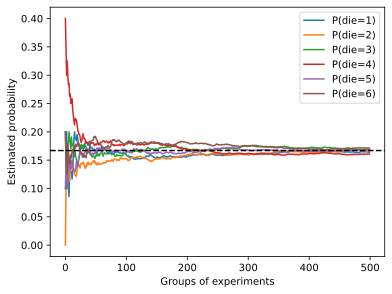

In [16]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(500)
cum_counts = tf.cumsum(counts, axis=0)

# estimates: 估计
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()